In [11]:
import sys
sys.path.insert(0, '/tf/utils/')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils import performance

In [27]:
compilado_path = '/tf/Etapa 4/compilado-v3_2024-04-21_20-26-05.xlsx'

In [28]:
df = pd.read_excel(compilado_path)

In [29]:
df.head()

,PESQ,STOI,SNR,PESQ (Wiener),STOI (Wiener),SNR (Wiener),PESQ (Kalman),STOI (Kalman),SNR (Kalman),PESQ (Attention Res U-Net),STOI (Attention Res U-Net),SNR (Attention Res U-Net),PESQ (FCRN),STOI (FCRN),SNR (FCRN),PESQ (PRIDNet),STOI (PRIDNet),SNR (PRIDNet)
0,1.296263,0.775160,4.962552,1.125602,0.723287,5.530267,1.360447,0.780339,5.754963,1.394868,0.791704,8.082027,1.803185,0.816958,10.677764,1.947838,0.837218,10.930438
1,1.407392,0.863934,7.951278,1.376512,0.676396,7.785751,1.562695,0.875750,8.259641,2.160427,0.909643,12.341846,2.165346,0.919648,12.170938,2.851363,0.934347,12.391658
2,1.184606,0.673506,1.862845,1.154473,0.490274,1.458280,1.241539,0.682699,2.587217,1.586685,0.692993,7.239708,1.363692,0.724794,7.331686,1.959027,0.744906,8.531525
3,1.719569,0.951005,15.418911,1.788009,0.952284,15.506893,1.826130,0.954020,15.652736,2.584886,0.953096,14.929259,2.538014,0.956434,14.726613,3.179115,0.952863,13.248987
4,2.278465,0.864223,14.771183,2.333027,0.853745,15.254821,2.377969,0.866999,14.973914,2.296512,0.858088,13.100498,2.650498,0.859748,12.805365,3.104145,0.879569,12.070394


In [30]:
df.describe()

,PESQ,STOI,SNR,PESQ (Wiener),STOI (Wiener),SNR (Wiener),PESQ (Kalman),STOI (Kalman),SNR (Kalman),PESQ (Attention Res U-Net),STOI (Attention Res U-Net),SNR (Attention Res U-Net),PESQ (FCRN),STOI (FCRN),SNR (FCRN),PESQ (PRIDNet),STOI (PRIDNet),SNR (PRIDNet)
count,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000
mean,2.041155,0.836137,9.017122,1.899577,0.810877,9.888846,2.140819,0.839099,9.497354,2.617758,0.880863,10.062750,2.588258,0.877870,9.891148,3.005205,0.888625,8.516321
std,0.517913,0.133232,5.475643,0.490619,0.138449,5.539327,0.542713,0.131405,5.316679,0.524293,0.113714,2.984198,0.558012,0.116053,2.949487,0.547932,0.102779,2.757953
min,1.046371,0.000010,-0.320085,1.028800,0.000010,-1.834221,1.052251,0.000010,-0.191596,1.058542,0.000010,-1.483941,1.037555,0.000010,-1.235302,1.114285,0.000010,-0.440791
25%,1.655998,0.769168,4.540335,1.526121,0.739390,5.371855,1.738834,0.774480,5.053033,2.244684,0.841125,7.953297,2.183389,0.837404,7.825631,2.633244,0.858031,6.364267
50%,1.963064,0.870843,8.951142,1.843027,0.843322,10.035268,2.071770,0.874226,9.625225,2.606742,0.916084,9.955787,2.572542,0.913469,9.796631,3.051742,0.919661,8.345448
75%,2.337994,0.937076,13.466206,2.202464,0.915377,14.371727,2.466371,0.938095,13.856760,2.979744,0.958277,12.079943,2.967581,0.957151,11.888822,3.413248,0.955542,10.412559
max,4.502423,0.999338,29.165568,4.431193,0.998801,31.128291,4.451563,0.999011,29.241796,4.450439,0.998898,21.047630,4.453498,0.999047,20.810499,4.249177,0.996144,20.703998


In [31]:
colors = {
    'Média Geral': '#313336',  # Cinza para média geral
    'Wiener': '#1c229c',  # Azul
    'Kalman': '#4f55c9',  # Laranja
    'Attention Res U-Net': '#991c2e',  # Verde
    'FCRN': '#7a1423',  # Vermelho
    'PRIDNet': '#540c17'  # Roxo
}

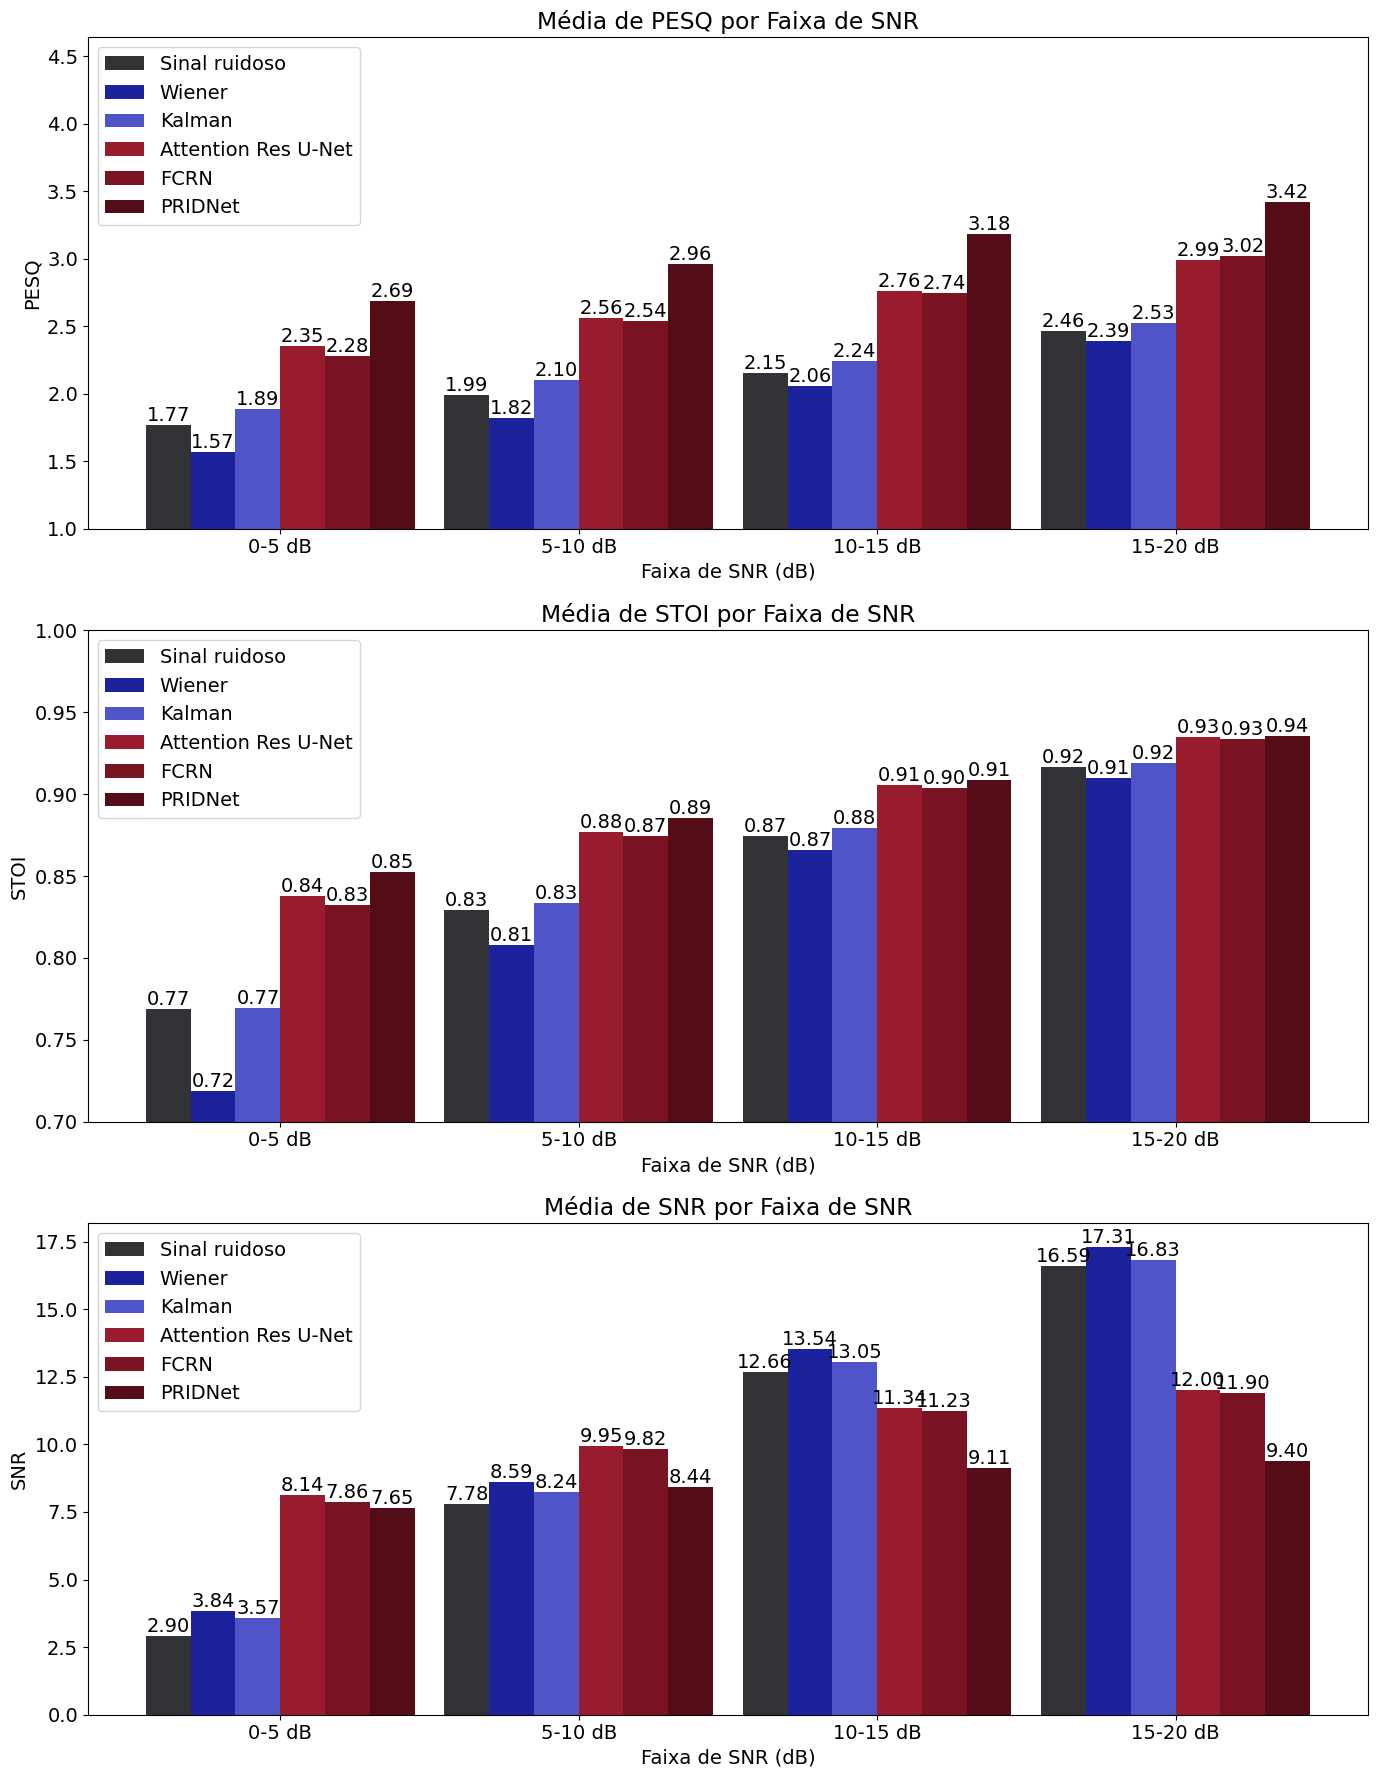

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 14})  # Ajuste conforme necessário


# Supondo que 'df' é o seu DataFrame
# Definindo as faixas de SNR
bins = [0, 5, 10, 15, 20]
labels = ['0-5 dB', '5-10 dB', '10-15 dB', '15-20 dB']
df['SNR Bin'] = pd.cut(df['SNR'], bins=bins, labels=labels, right=False)

# Preparando os dados para plotagem
methods = ['Wiener', 'Kalman', 'Attention Res U-Net', 'FCRN', 'PRIDNet']
metrics = ['PESQ', 'STOI', 'SNR']

colors = {
    'Média Geral': '#313336',  # Cinza para média geral
    'Wiener': '#1c229c',  # Azul
    'Kalman': '#4f55c9',  # Laranja
    'Attention Res U-Net': '#991c2e',  # Verde
    'FCRN': '#7a1423',  # Vermelho
    'PRIDNet': '#540c17'  # Roxo
}

# Criando uma figura e eixos para os gráficos
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Configurações para barras lado a lado
width = 0.15  # Largura das barras
n = len(methods) + 1  # Número de métodos + 1 para a média geral
indices = np.arange(len(labels))  # Índices das faixas de SNR

# Plotando os gráficos
for i, metric in enumerate(metrics):
    # Calcular e plotar a média geral para cada faixa
    overall_mean = df.groupby('SNR Bin')[metric].mean()
    bars = axes[i].bar(indices, overall_mean, width=width, label='Sinal ruidoso', color=colors['Média Geral'])
    
    # Adicionando datalabels no topo das barras
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black')
    
    for j, method in enumerate(methods):
        # Calculando a média para cada faixa e métrica
        grouped_data = df.groupby('SNR Bin')[f'{metric} ({method})'].mean()
        # Deslocando cada barra
        bars = axes[i].bar(indices + (j + 1) * width, grouped_data, width=width, label=method, color=colors[method])
        
        # Adicionando datalabels no topo das barras
        for bar in bars:
            yval = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black')
    
    axes[i].set_title(f'Média de {metric} por Faixa de SNR')
    axes[i].set_xticks(indices + width * (n - 1) / 2)
    axes[i].set_xticklabels(labels)
    axes[i].set_xlabel('Faixa de SNR (dB)')
    axes[i].set_ylabel(metric)
    axes[i].legend(loc='upper left')  # Posicionando a legenda no canto superior esquerdo

# Ajustando o eixo y para PESQ
axes[0].set_ylim(1.0, 4.64)

# Ajustando o eixo y para PESQ
axes[1].set_ylim(0.7, 1.0)


plt.tight_layout()
plt.show()
